In [1]:
# Mengizinkan pengguna untuk mengupload file ke Google Colab
from google.colab import files
uploaded = files.upload()

Saving netflix_titles.csv to netflix_titles.csv


In [2]:
# Import pustaka yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Untuk visualisasi yang lebih estetis
sns.set(style="whitegrid")

In [3]:
# Membaca dataset Netflix
df = pd.read_csv('netflix_titles.csv')

# Menampilkan 5 baris pertama
print("5 Baris Pertama:")
display(df.head())

# Informasi umum tentang dataset
print("\nInformasi Dataset:")
df.info()

5 Baris Pertama:


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...



Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [4]:
# Menghapus baris dengan data kosong di kolom penting
df = df.dropna(subset=['title', 'type', 'country', 'release_year'])

# Mengisi nilai kosong pada kolom 'rating' dengan modus (nilai terbanyak)
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])

# Membersihkan spasi di kolom 'date_added' dan mengubahnya menjadi format datetime
df['date_added'] = df['date_added'].str.strip()
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Membuat fitur baru: tahun saat konten ditambahkan ke Netflix
df['year_added'] = df['date_added'].dt.year

# Membuat fitur baru: jumlah pemeran dalam setiap judul
df['num_cast'] = df['cast'].apply(lambda x: len(str(x).split(',')) if pd.notnull(x) else 0)

<ipython-input-4-76b756932c28>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rating'] = df['rating'].fillna(df['rating'].mode()[0])


<ipython-input-5-5c8f6b1c9058>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='type', palette='Set2')


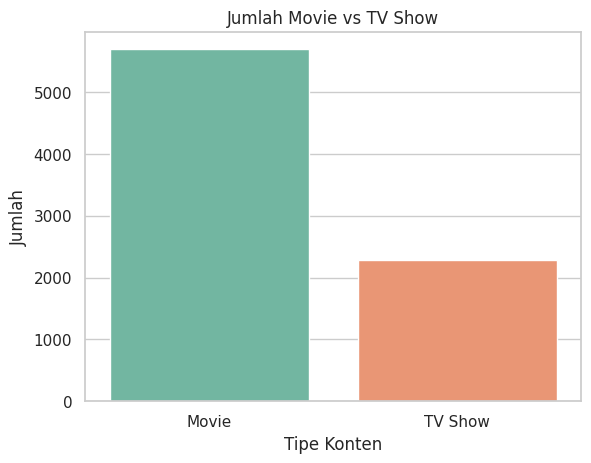

In [5]:
sns.countplot(data=df, x='type', palette='Set2')
plt.title('Jumlah Movie vs TV Show')
plt.xlabel('Tipe Konten')
plt.ylabel('Jumlah')
plt.show()

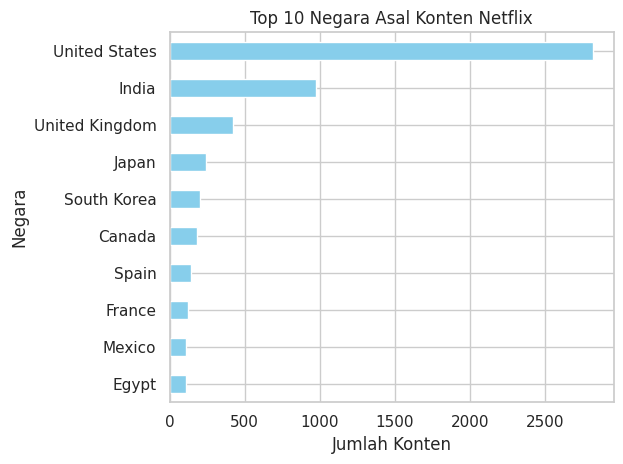

In [6]:
top_countries = df['country'].value_counts().head(10)

top_countries.plot(kind='barh', color='skyblue')
plt.title('Top 10 Negara Asal Konten Netflix')
plt.xlabel('Jumlah Konten')
plt.ylabel('Negara')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

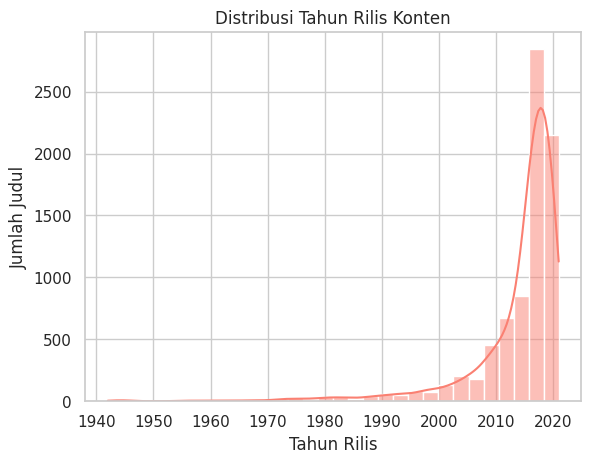

In [7]:
sns.histplot(df['release_year'], bins=30, kde=True, color='salmon')
plt.title('Distribusi Tahun Rilis Konten')
plt.xlabel('Tahun Rilis')
plt.ylabel('Jumlah Judul')
plt.show()

<ipython-input-8-36f6469e98ab>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='rating', data=df, order=df['rating'].value_counts().index, palette='muted')


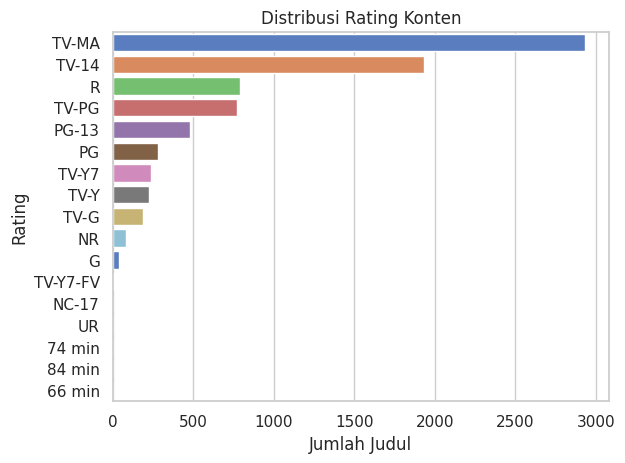

In [8]:
sns.countplot(y='rating', data=df, order=df['rating'].value_counts().index, palette='muted')
plt.title('Distribusi Rating Konten')
plt.xlabel('Jumlah Judul')
plt.ylabel('Rating')
plt.show()

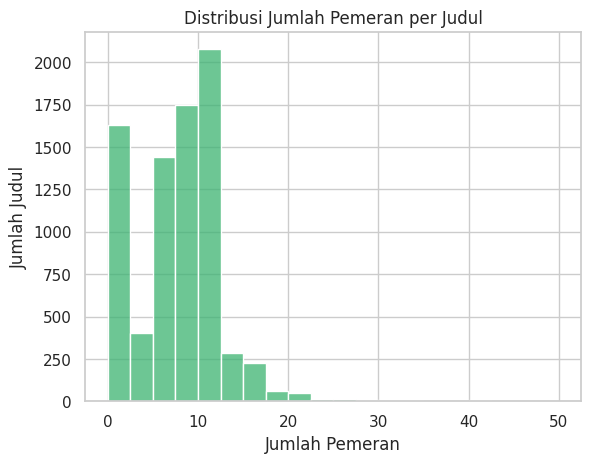

In [9]:
sns.histplot(df['num_cast'], bins=20, color='mediumseagreen')
plt.title('Distribusi Jumlah Pemeran per Judul')
plt.xlabel('Jumlah Pemeran')
plt.ylabel('Jumlah Judul')
plt.show()

## 📘 Penjelasan Matematis

### 1. **Distribusi Frekuensi**

Distribusi frekuensi menggambarkan jumlah kemunculan masing-masing kategori dalam suatu variabel. Misalnya, banyaknya konten dengan rating tertentu atau jumlah judul dari negara tertentu.

$$
f(x) = \text{jumlah kemunculan nilai } x \text{ pada dataset}
$$

Contoh implementasi pada countplot dan value_counts.

---

### 2. **Modus (Mode)**

Modus adalah nilai yang paling sering muncul pada sebuah kolom. Dalam pengisian missing value, modus digunakan karena merepresentasikan nilai paling umum.

$$
\text{mode}(X) = x \quad \text{dengan} \quad f(x) = \max(f(X))
$$

Keterangan:
- \( X \): himpunan nilai dalam kolom
- \( f(x) \): frekuensi dari nilai \( x \)

---

### 3. **Ekstraksi Tahun dari Tanggal**

Ketika kita mengonversi kolom tanggal ke tipe datetime, kita bisa mengekstrak tahunnya:

$$
\text{year_added}_i = \text{year}(date\_added_i)
$$

Untuk setiap entri \( i \), kita ambil tahunnya sebagai nilai baru.

---

### 4. **Jumlah Pemeran (num\_cast)**

Fitur ini dihitung dengan memisahkan string pada kolom cast menggunakan tanda koma, lalu menghitung jumlah elemen:

$$
\text{num_cast}_i =
\begin{cases}
|\text{split}(cast_i, ',')|, & \text{jika } cast_i \neq \text{NaN} \\
0, & \text{jika } cast_i = \text{NaN}
\end{cases}
$$

Dimana:
-  $
text{split}(cast_i, ',') memisahkan nama pemeran
$
- $
( |⋅| ) menyatakan jumlah elemen
$
---

### 5. **Distribusi Histogram**

Histogram menunjukkan estimasi distribusi dari data numerik. Misalnya distribusi release_year:

$$
h_i = \text{jumlah data } x \text{ dimana } x \in [b_i, b_{i+1})
$$

Dengan:

- \$
( b_i, b_{i+1} ) : interval bin ke -( i )
$